In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [2]:
store = pd.read_excel("data science//SuperstoreDataset.xlsx")

In [8]:
store.head(2)

,s.no,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [5]:
store.shape

(9994, 18)

In [4]:
store.Segment.unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [5]:
#columns which have the missing values
missing_columns = [feature for feature in store.columns if store[feature].isna().sum() >= 1]
print('missing_columns:-',len(missing_columns))

missing_columns:- 0


In [6]:
print('Shape of the super_store_dataset:-',store.shape)
print('Total sales in the store:-',store.Sales.sum())
print('Total Profit in the store:-',store.Profit.sum())

Shape of the super_store_dataset:- (9994, 18)
Total sales in the store:- 2297200.8603000003
Total Profit in the store:- 286397.0217


In [7]:
#divide only profit sales
store_profit = store[store["Profit"]>=0]

In [8]:
print('Shape of the store_profit:-',store_profit.shape)
print('Total sales which given only profit:-',store_profit['Sales'].sum())
print('Profit:',store_profit['Profit'].sum())

Shape of the store_profit:- (8123, 18)
Total sales which given only profit:- 1828493.7055000002
Profit: 442528.3074


In [9]:
#divide only loss sales
store_loss = store[store["Profit"] < 0]

In [10]:
print('Shape of the store_loss:-',store_loss.shape)
print('Total sales which given only loss:-',store_loss['Sales'].sum())
print('Loss:',store_loss['Profit'].sum())

Shape of the store_loss:- (1871, 18)
Total sales which given only loss:- 468707.1548
Loss: -156131.2857


For 8123 sale the profit was 442528.30 but due to 1841 sale the loss is 156131.28.due to 1841 sales the profit is reduced 35% and the total profit will be 286397.0217

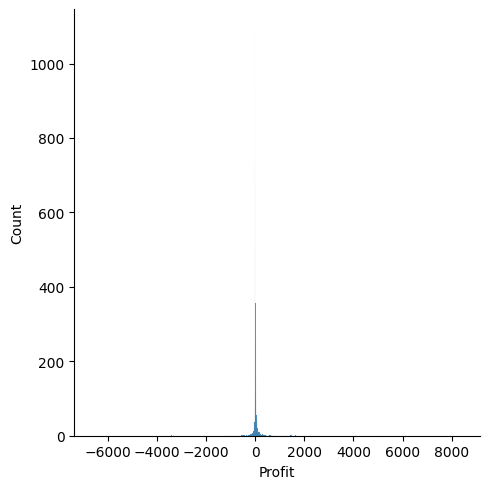

In [11]:
#distribution of the treget variablemjjj
sns.displot(store.Profit)

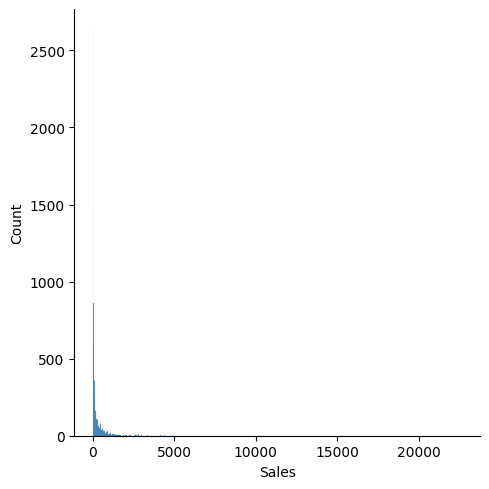

In [12]:
sns.displot(store.Sales)

<Axes: >

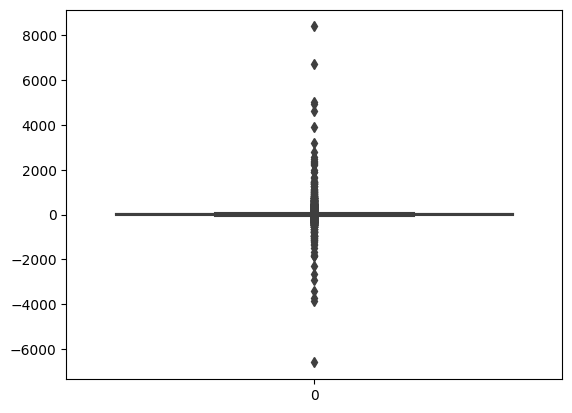

In [13]:
sns.boxplot(store['Profit'])

In [14]:
#removing the outliers
q1 = store['Profit'].quantile(0.25)
q3 = store['Profit'].quantile(0.75)
iqr = q3 - q1
lowerlimit = q1 - 1.5 * iqr
upperlimit = q3 + 1.5 * iqr

In [15]:
lowerlimit,upperlimit

(-39.724125, 70.816875)

In [16]:
#the normal profit if divided with respect to lower and upper limit
normal_store = store[(store['Profit'] < upperlimit) & (store['Profit'] > lowerlimit)]

In [17]:
normal_store.head()

,s.no,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,3,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656


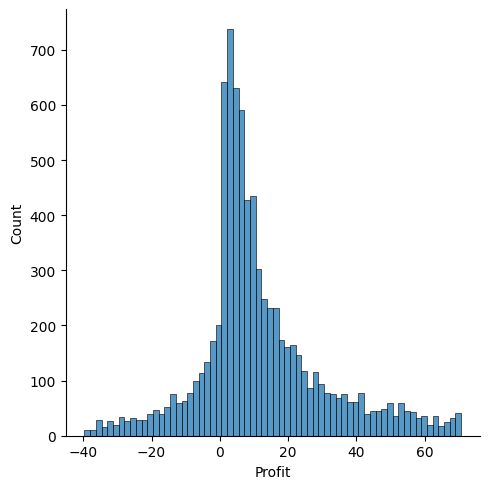

In [19]:
sns.displot(normal_store['Profit'])

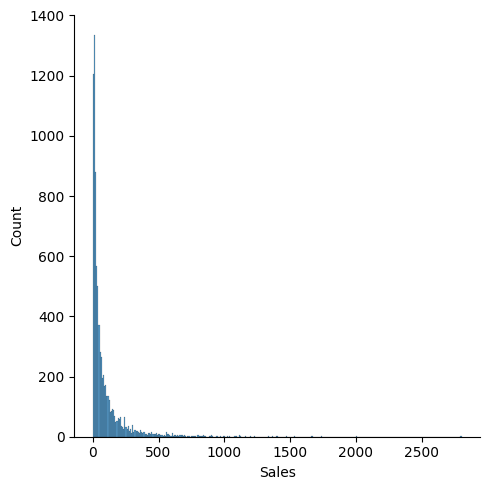

In [20]:
sns.displot(normal_store['Sales'])

In [21]:
print('Shape of normal_store:-',normal_store.shape)
print('Total no of sales given normal profit',normal_store['Sales'].sum())
print('normal profit:',normal_store['Profit'].sum())

Shape of normal_store:- (8113, 18)
Total no of sales given normal profit 738699.5648
normal profit: 94143.9496


Out of 9994 sales, 81.17% of them account for only 32% of the total sales amount, which is equal to $738,699.56. 

In [22]:
#abnormal_profit divided by upperlimit
adnormal_profit = store[store['Profit'] >= upperlimit]

In [23]:
print('Shape of adnormal_profit:-',adnormal_profit.shape)
print('Total no of sales given adnormal profit:',adnormal_profit['Sales'].sum())
print('adnormal profit:',adnormal_profit['Profit'].sum())

Shape of adnormal_profit:- (1277, 18)
Total no of sales given adnormal profit: 1213419.6935
adnormal profit: 332580.4368


Here out of 9994 sales, only 12.77% of them do not have any loss and account for 52.8% of the total sales amount. 

Only for 1277 no of sale the profit is 332580.4368, it is 75 % in the totalmprofit of the sales. We should research this. 

In [25]:
#adnormal_loss divided by lowerlimit
adnormal_loss = store[store['Profit'] < lowerlimit]

In [26]:
print('Shape of adnormal_loss:-',adnormal_loss.shape)
print('Total no of sales given adnormal loss:',adnormal_loss['Sales'].sum())
print('adnormal loss:',adnormal_loss['Profit'].sum())

Shape of adnormal_loss:- (604, 18)
Total no of sales given adnormal loss: 345081.602
adnormal loss: -140327.3647


Due only 604 no of Sales 140327.36 is the loss, it is 89.8% in total loss.

for  further research ecel is easy(pivote tables)

In [27]:
#combinding the two data sets (profit and loss)
adnormal_sales = pd.concat([adnormal_profit,adnormal_loss], axis= 0)

In [28]:
#downloding the datasets
adnormal_sales.to_csv('data science//New_adnormal_sales.csv',index = False)
normal_store.to_csv('data science//New_normal_sales.csv',index = False)